Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## Llibreries utilitzades

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from metrics_module import metrics
from dataloader_module import load_data


## Càrrega i pre-processament de les dades

In [3]:
datafile = "data/healthcare-dataset-stroke-data.csv"

X, y = load_data(datafile)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creació i test de la regressió logística

Accuracy: 0.7857
Precision: 0.7500
Recall: 0.8571
F1 Score: 0.8000


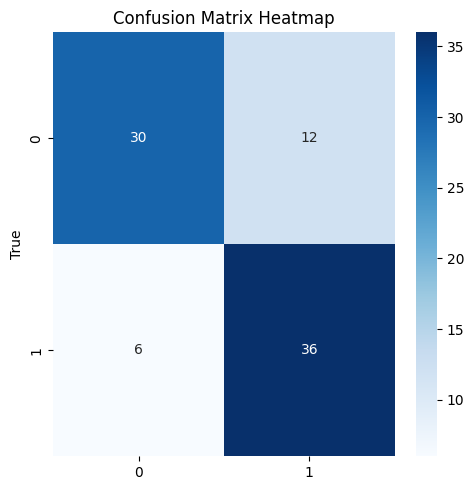

In [4]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

## Visualització dels factors més importants pel model

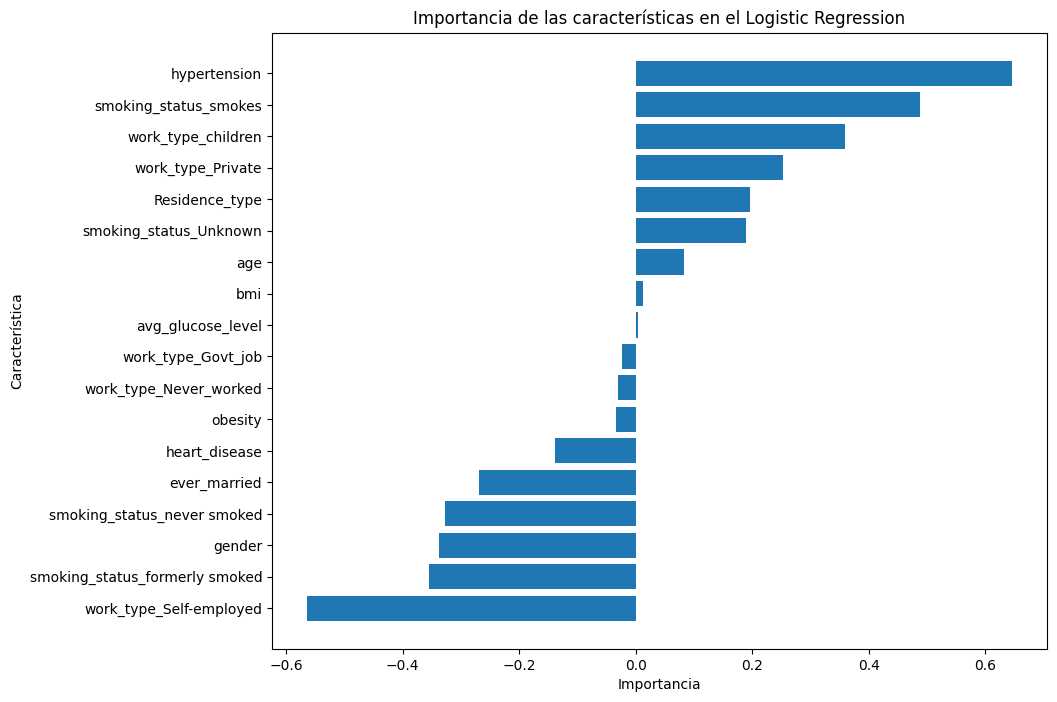

In [5]:
feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

## Eliminació d'alguns factors

Prova per a evaluar si es poden generar prediccions sense dades mèdiques, més accessibles per a la població general.

Accuracy: 0.7738
Precision: 0.7255
Recall: 0.8810
F1 Score: 0.7957


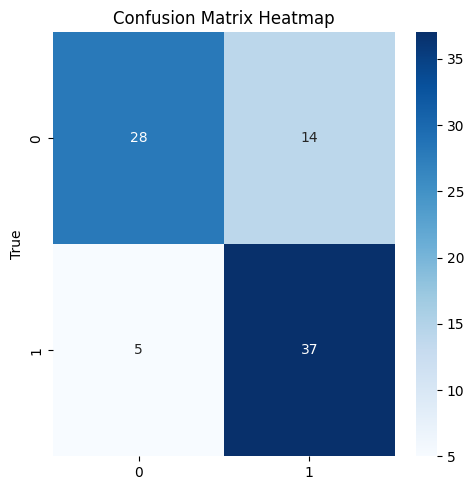

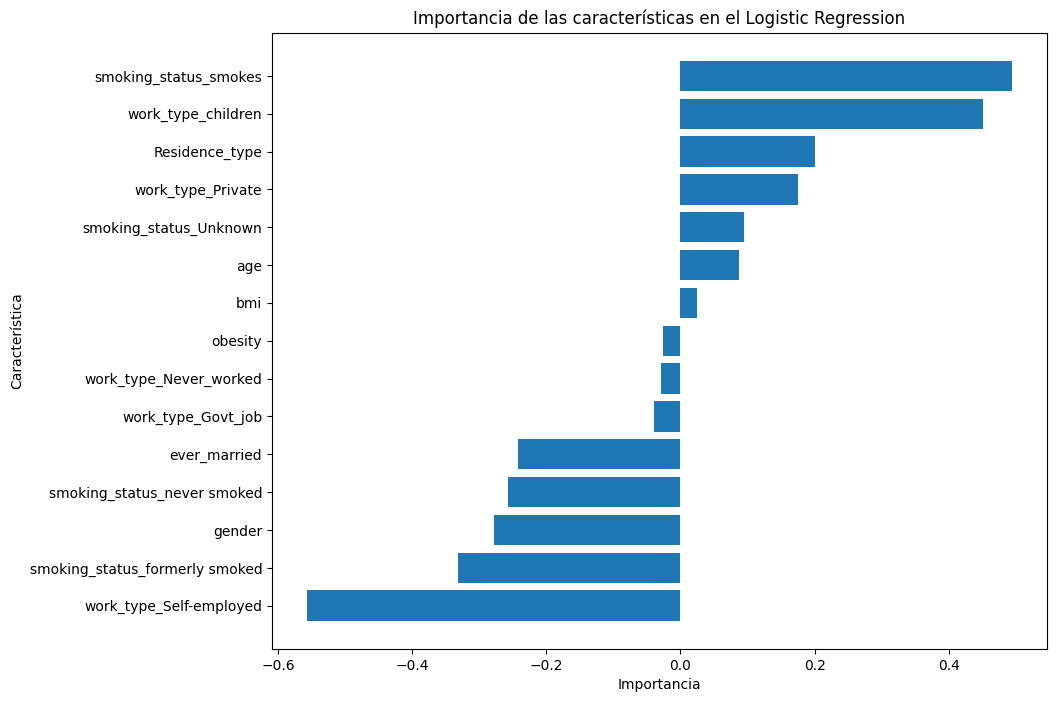

In [6]:
X = X.drop(columns=["hypertension", "heart_disease", "avg_glucose_level"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()
